In [14]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.fftpack import fft

In [15]:
# Função de criação do espectro de FFT
def espectro_fft(df, Fs):
  DF = pd.DataFrame()
  for axis in df.columns:
    x = df[axis].values
    n = np.size(x)
    fr = (Fs/2)*np.linspace(0,1,int(n/2))
    # Compute FFT
    X = fft(x)
    X_m = (2/n)*abs(X[0:np.size(fr)])
    DF[f"A_{axis}"] = X_m
  DF['Freq'] = fr
  DF.set_index('Freq', inplace=True)
  return DF

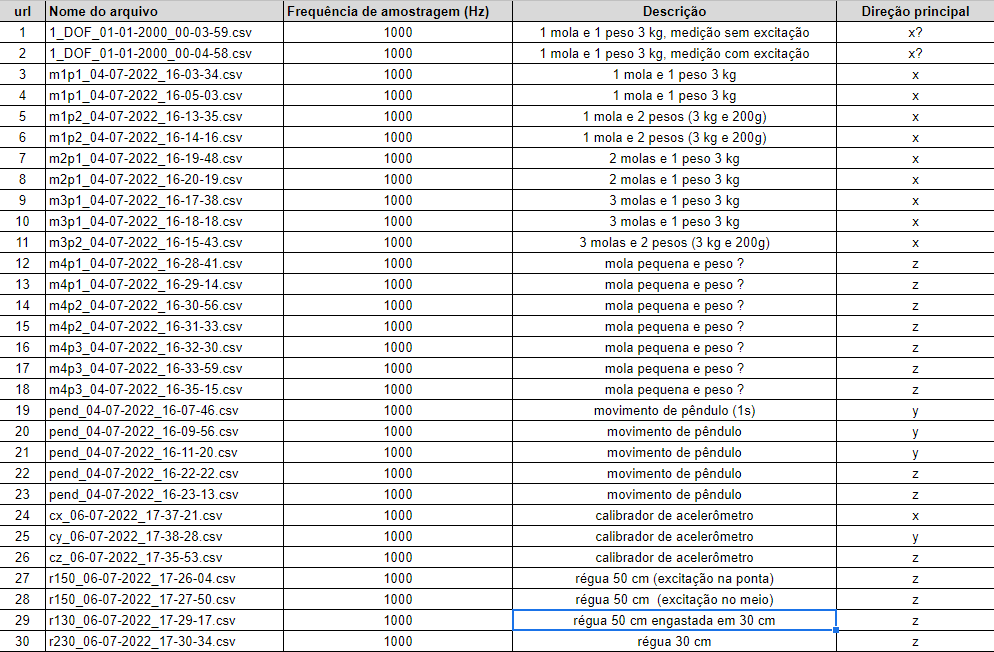

In [16]:
# Arquivos do github URLs: https://github.com/gdnpleite/ifpe_vibmec/tree/main/data
url1 = '1_DOF_01-01-2000_00-03-59.csv'
url2 = '1_DOF_01-01-2000_00-04-58.csv'
url3 = 'm1p1_04-07-2022_16-03-34.csv'
url4 = 'm1p1_04-07-2022_16-05-03.csv'
url5 = 'm1p2_04-07-2022_16-13-35.csv'
url6 = 'm1p2_04-07-2022_16-14-16.csv'
url7 = 'm2p1_04-07-2022_16-19-48.csv'
url8 = 'm2p1_04-07-2022_16-20-19.csv'
url9 = 'm3p1_04-07-2022_16-17-38.csv'
url10 = 'm3p1_04-07-2022_16-18-18.csv'
url11 = 'm3p2_04-07-2022_16-15-43.csv'
url12 = 'm4p1_04-07-2022_16-28-41.csv'
url13 = 'm4p1_04-07-2022_16-29-14.csv'
url14 = 'm4p2_04-07-2022_16-30-56.csv'
url15 = 'm4p2_04-07-2022_16-31-33.csv'
url16 = 'm4p3_04-07-2022_16-32-30.csv'
url17 = 'm4p3_04-07-2022_16-33-59.csv'
url18 = 'm4p3_04-07-2022_16-35-15.csv'
url19 = 'pend_04-07-2022_16-07-46.csv'
url20 = 'pend_04-07-2022_16-09-56.csv'
url21 = 'pend_04-07-2022_16-11-20.csv'
url22 = 'pend_04-07-2022_16-22-22.csv'
url23 = 'pend_04-07-2022_16-23-13.csv'
url24 = 'cx_06-07-2022_17-37-21.csv'
url25 = 'cy_06-07-2022_17-38-28.csv'
url26 = 'cz_06-07-2022_17-35-53.csv'
url27 = 'r150_06-07-2022_17-26-04.csv'
url28 = 'r150_06-07-2022_17-27-50.csv'
url29 = 'r130_06-07-2022_17-29-17.csv'
url30 = 'r230_06-07-2022_17-30-34.csv'

In [17]:
# Indicar qual a url a ser lida. Informar a url após o sinal de '+'. ex. '+url20'
url_0 = 'https://raw.githubusercontent.com/gdnpleite/ifpe_vibmec/main/data/'+url1
url_0

'https://raw.githubusercontent.com/gdnpleite/ifpe_vibmec/main/data/1_DOF_01-01-2000_00-03-59.csv'

In [18]:
df = pd.read_csv(url_0) # leitura do dado do github

In [19]:
# Criação da coluna seconds
df['seconds'] = df['micros']/1e6
df = df.set_index('seconds')
df.drop('micros', axis = 1, inplace = True)
# Conversão para m/s^2
df = df[['ax', 'ay', 'az']] * (9.81 / 16384.0)

In [20]:
# Removendo a component DC (centralizando a medição em zero)
df.ax = df.ax.values - np.mean(df.ax.values)
df.ay = df.ay.values - np.mean(df.ay.values)
df.az = df.az.values - np.mean(df.az.values)

In [21]:
df.head()

,ax,ay,az
seconds,,,
0.000000,0.020316,0.023170,-0.014475
0.000999,-0.008424,-0.003175,-0.016870
0.002000,-0.020399,0.025565,0.007080
0.003000,0.013131,0.020775,-0.009685
0.003999,0.025106,0.023170,-0.062376


In [22]:
# calculando o dt
tam = df.shape[0]
dt_vec = (df.index[1:tam]-df.index[0:(tam-1)])
df_dt = pd.DataFrame(dt_vec)
#fig = px.line(df_dt)
#fig.show()
# cálculo da frequência de amostragem 
fs = 1/np.mean(dt_vec)
print(f"Frequência de amostragem = {fs} Hz")

Frequência de amostragem = 1000.0 Hz


In [23]:
fig = px.line(df, y = ['ax', 'ay', 'az'])
fig.update_layout(
    xaxis_title=r'Tempo [s]',
    yaxis_title=r'$\text{Amplitude } [m/s^2]$'
)
fig.show()

In [24]:
# Espectro de Fourrier
df_freq  = espectro_fft(df, fs)
#df_freq = pd.DataFrame(np.transpose([f, A]), columns=['Freq', 'Amp'])

In [25]:
df_freq.head()

,A_ax,A_ay,A_az
Freq,,,
0.000000,2.659384e-15,5.863088e-17,4.625411e-16
0.050005,6.874881e-04,1.260058e-03,6.038904e-03
0.100010,6.266260e-04,7.692404e-04,3.766826e-03
0.150015,5.602577e-04,7.439759e-04,8.105057e-04
0.200020,3.095551e-04,6.726621e-04,2.072763e-03


In [26]:
fig = px.line(df_freq, y = ['A_ax', 'A_ay', 'A_az'])
fig.update_layout(
    xaxis_title=r'Frequency [Hz]',
    yaxis_title=r'$\text{Amplitude }  [m/s^2]$'
)
fig.show()